In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allison.regression import LinearRegression
from allison.utils.functions.loss import mean_squared_error
from allison.utils.metrics import r2_score
from allison.utils.data import train_test_split

In [3]:
n = 1000
x=np.linspace(2,20,n)
y=2*x + 1 + 2*np.sin(x) + np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.000000,7.255044
1,2.018018,7.853121
2,2.036036,6.667582
3,2.054054,6.377597
4,2.072072,7.013235


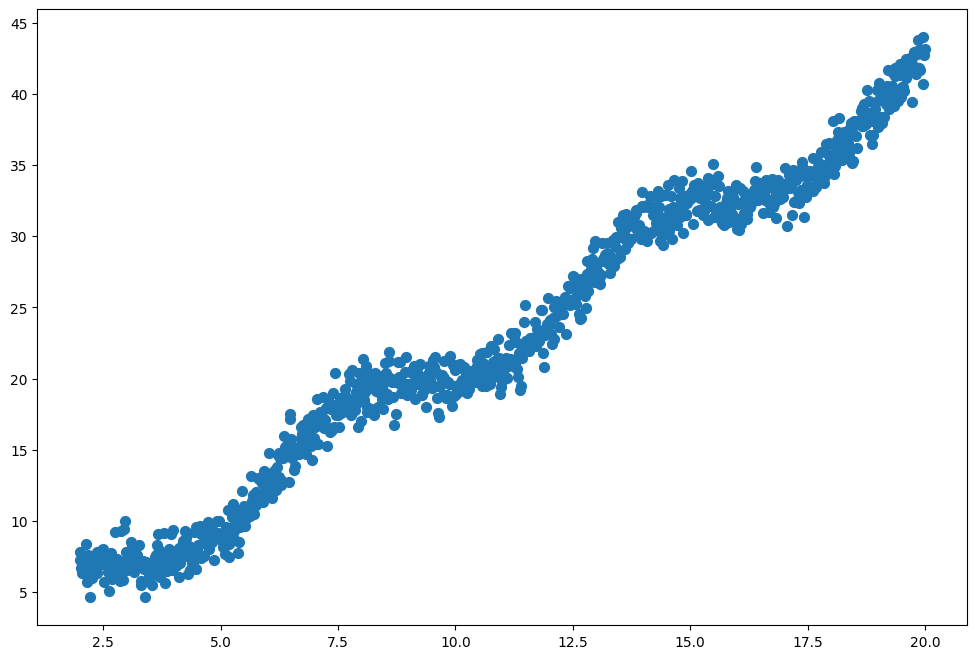

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [5]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [6]:
model=LinearRegression(loss_function=mean_squared_error,
                      metric=r2_score,
                      lr = 0.001)

model.train(X_train, y_train,n_iters=20, history_train=True)

Iter:	2	==================================================>	 mean_squared_error: 723.828% 	 r2_score: -143603.64% 

Iter:	4	==================================================>	 mean_squared_error: 234.359% 	 r2_score: -1208.92% 

Iter:	6	==================================================>	 mean_squared_error: 76.760% 	 r2_score: -54.78% 

Iter:	8	==================================================>	 mean_squared_error: 26.214% 	 r2_score: 64.89% 

Iter:	10	==================================================>	 mean_squared_error: 10.115% 	 r2_score: 88.91% 

Iter:	12	==================================================>	 mean_squared_error: 5.053% 	 r2_score: 95.02% 

Iter:	14	==================================================>	 mean_squared_error: 3.498% 	 r2_score: 96.74% 

Iter:	16	==================================================>	 mean_squared_error: 3.043% 	 r2_score: 97.26% 

Iter:	18	==================================================>	 mean_squared_error: 2.922% 	 r2_score: 97.41% 

In [7]:
history = model.history_train
history

{'iter': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'loss': [np.float64(723.8281604426596),
  np.float64(234.35860250653172),
  np.float64(76.76017659249355),
  np.float64(26.214151017212743),
  np.float64(10.115438987814832),
  np.float64(5.052777617362604),
  np.float64(3.4980969242389506),
  np.float64(3.042570601820513),
  np.float64(2.922226572834898),
  np.float64(2.8986805947345715)],
 'precision': [np.float64(-1436.0363705019097),
  np.float64(-12.08918780383929),
  np.float64(-0.5477989486807091),
  np.float64(0.648937444093421),
  np.float64(0.8891077958794599),
  np.float64(0.9501553898937164),
  np.float64(0.9674246102788233),
  np.float64(0.972560577479941),
  np.float64(0.9741163182479384),
  np.float64(0.9745847722284886)],
 'params': [{'bias': array([0.]), 'weights': array([-0.85131227])},
  {'bias': array([0.1136687]), 'weights': array([0.40360045])},
  {'bias': array([0.17833109]), 'weights': array([1.11747908])},
  {'bias': array([0.2151154]), 'weights': array([1.5235811

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']

    a = model.weights[0]
    b = model.bias[0]

    ax.scatter(X_train, y_train, s=50)
    if i > 0:
        ax.plot(X_train, model.predict(X_train), lw=3, c='red',label=f'Predicted y = {a:.2f}x + {b:.2f}, loss = {history["loss"][i-1]:.2f}, r2 = {history["precision"][i-1]:.2f}%')
    else:
        ax.plot(X_train, model.predict(X_train), lw=3, c='red', label=f'Predicted y = {a:.2f}x + {b:.2f}')
    ax.legend()



# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)

plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())

In [9]:
r2_score =model.evaluate(X_test, y_test)
r2_score

np.float64(0.9690228546191195)

Text(0.5, 1.0, 'Linear Regression on Test Data(Accuracy:0.97%)')

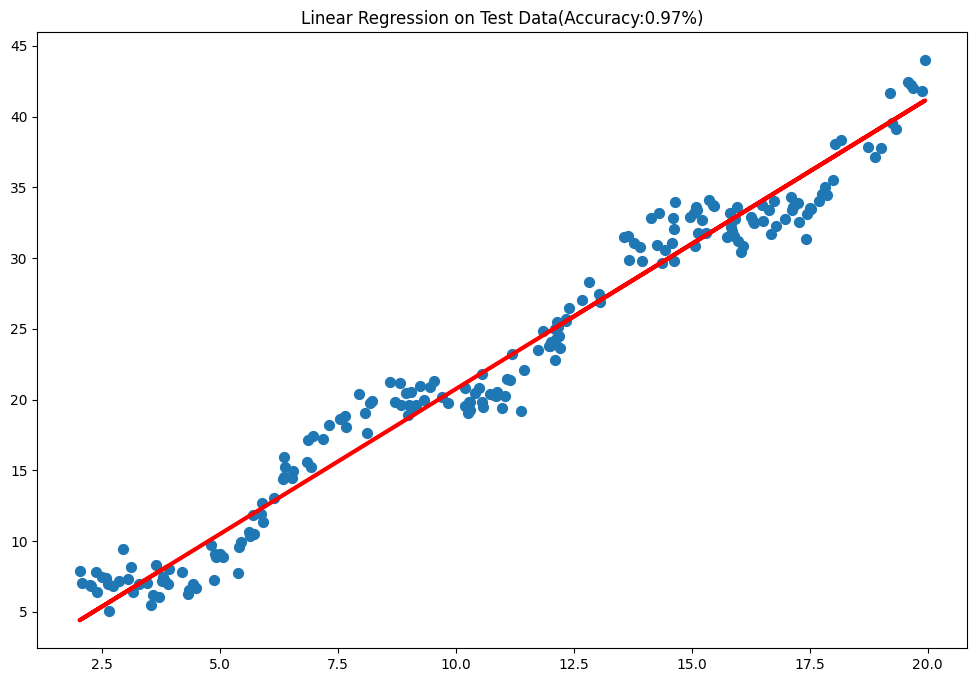

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.plot(X_test,model.predict(X_test), lw=3, c='red')
plt.title(f'Linear Regression on Test Data(Accuracy:{r2_score:.2f}%)')